<a href="https://colab.research.google.com/github/DrSnek/PocketDoctor/blob/main/Copy_of_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Imports

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import itertools
from sklearn.impute import SimpleImputer

from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm

!pip install anvil-uplink

import anvil.server
anvil.server.connect("VFITZUSM3GHE46KQMIY7X3MH-JVTABAU63SWWZ5GO")

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


!pip install tflearn

from keras.models import Sequential, Model
from keras.layers import Conv2D, Dropout, MaxPooling2D, Input
from keras.layers import BatchNormalization, Activation, Flatten, Dense
from tensorflow.keras import initializers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###Explore and Process Dataset

In [ ]:
url = "https://drive.google.com/file/d/1se6o3oxuykXXmI-90vc1e4TMwN1vq9zL/view?usp=sharing"
url ='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print(df)
df1 = df.drop(['SkinThickness'], axis = 1)
df2 = df1.drop(['DiabetesPedigreeFunction'], axis = 1)
df3 = df2.drop(['Insulin'], axis = 1)
print("")
print(df3)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
719           10      101             76             48      180  32.9   
720            2      122             70             27        0  36.8   
721            5      121             72             23      112  26.2   
722            1      126             60              0        0  30.1   
723            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

Seaborn:

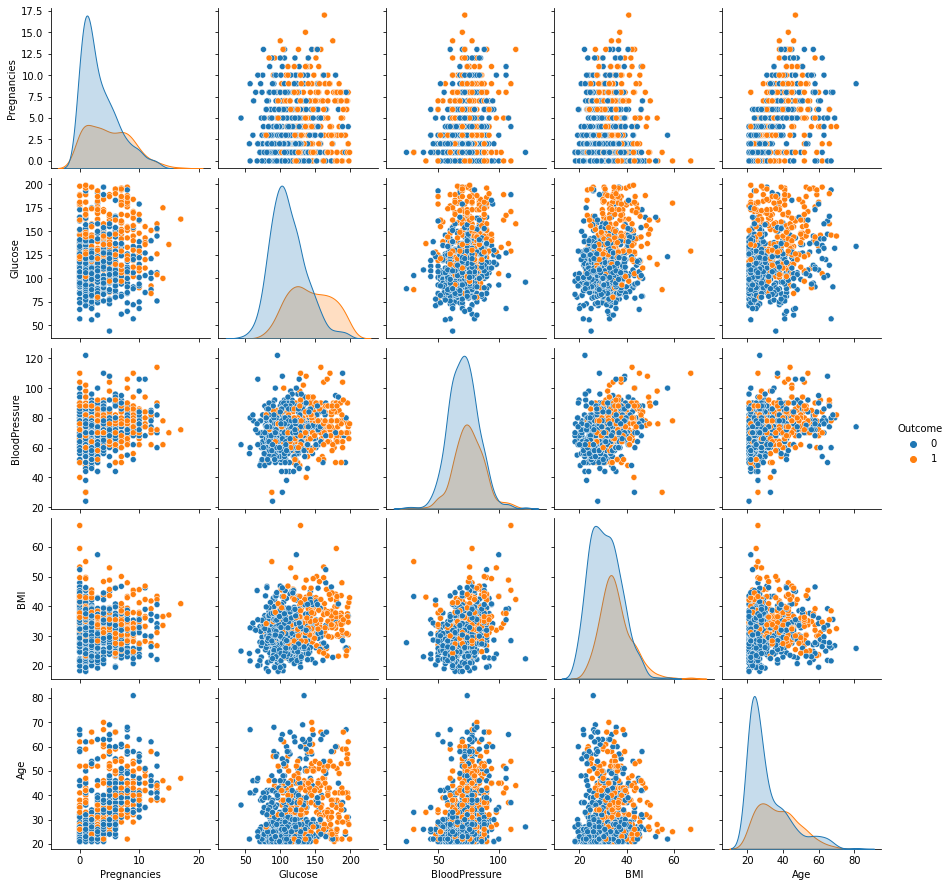

In [ ]:
sns.pairplot(data=df3, hue = 'Outcome')

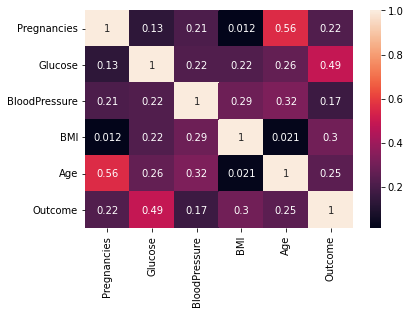

In [ ]:
sns.heatmap(df3.corr(), annot = True)

###Data Imputation

In [ ]:
check = 0
for item in df3['BMI']:
  if item == 0:
    check += 1

print(check)

0


###Helper Functions

In [ ]:
def print_accuracy(y_test, y_pred):
  print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, y_pred)))
  print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, y_pred,labels=None, pos_label=1, average='binary', sample_weight=None)))
  print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, y_pred,labels=None, pos_label=1, average='binary', sample_weight=None)))
  print("%-12s %f" % ('F1 Score:', metrics.f1_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)))
  print()

def draw_confusion_matrix(y_test, y_pred, classes):
  plt.cla()
  plt.clf()
  matrix = confusion_matrix(y_test, y_pred)
  plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title("Confusion Matrix")
  plt.colorbar()
  num_classes = len(classes)
  plt.xticks(np.arange(num_classes), classes, rotation=90)
  plt.yticks(np.arange(num_classes), classes)
  fmt = 'd'
  thresh = matrix.max() / 2.
  for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    plt.text(j, i, format(matrix[i, j], fmt), horizontalalignment="center", color="white" if matrix[i, j] > thresh else "black")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()
  plt.show()
  print()

def draw_roc_curve(y_test, y_score, title, c="blue", line_width=1):
  fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(y_test, y_score)
  plt.figure(2)
  aucroc = metrics.auc(fpr_log_reg, tpr_log_reg)
  plt.plot(fpr_log_reg, tpr_log_reg, color=c, lw=line_width, label = 'AUC = %0.3f' % aucroc)
  plt.title(title)
  plt.xlabel('False Positive Rates')
  plt.ylabel('True Positive Rates')
  plt.legend(loc = 'lower right')
  plt.show()
  print()

def draw_roc_curve_individual(y_test, y_score, label, line_width=1):
  fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(y_test, y_score)
  # plt.figure(2)
  aucroc = metrics.auc(fpr_log_reg, tpr_log_reg)
  plt.plot(fpr_log_reg, tpr_log_reg, lw=line_width, label = label + ', AUC = %0.3f' % aucroc)
  # plt.title(title)
  plt.xlabel('False Positive Rates')
  plt.ylabel('True Positive Rates')
  # plt.legend(loc = 'lower right')
  # plt.show()
  # print()

###Standardize and Encode Data

In [ ]:
user_backup = df3
X = df3.drop("Outcome", axis = 1)
Y = df3["Outcome"].copy()

print("X shape before processing is", X.shape)
df_numerical = X

numerical_pipeline = Pipeline([
                               ("std_scaler", StandardScaler())
                               ])

numerical_features = list(df_numerical)

full_pipeline = ColumnTransformer([
                ("numerical", numerical_pipeline, numerical_features),
                ])
X_prepared = full_pipeline.fit_transform(X)

print("X shape after processing is", X_prepared.shape)
np.unique(np.isnan(X_prepared), return_counts=True)

X shape before processing is (724, 5)
X shape after processing is (724, 5)


(array([False]), array([3620]))

###Prepare Test Data Splits

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_prepared, Y, test_size = 0.3, random_state = 42)

CNN:

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(500,500,500,500,500), activation='relu', solver='adam', max_iter=10,random_state=42)
mlp.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(500, 500, 500, 500, 500), max_iter=10,
              random_state=42)

In [ ]:
pred1 = mlp.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692:

Accuracy:    0.743119
Precision:   0.594203
Recall:      0.594203
F1 Score:    0.594203



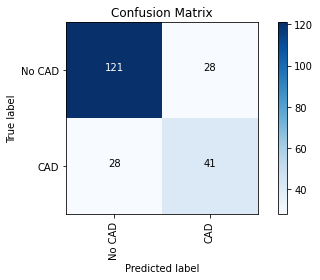

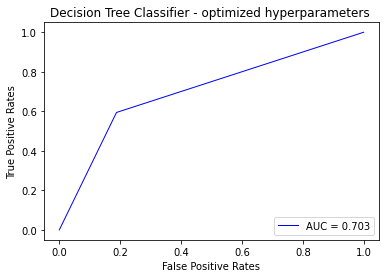

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_predict

pred = cross_val_predict(mlp,x_test,y_test,cv=5)
print_accuracy(y_test, pred)
draw_confusion_matrix(y_test, pred, ["No CAD", "CAD"])
draw_roc_curve(y_test, pred, "Decision Tree Classifier - optimized hyperparameters ", c="blue", line_width=1)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END C=10, kernel=linear, probability=True;, score=0.722 total time=   0.1s
[CV 2/5] END C=10, kernel=linear, probability=True;, score=0.528 total time=   0.1s
[CV 3/5] END C=10, kernel=linear, probability=True;, score=0.722 total time=   0.1s
[CV 4/5] END C=10, kernel=linear, probability=True;, score=0.389 total time=   0.1s
[CV 5/5] END C=10, kernel=linear, probability=True;, score=0.556 total time=   0.1s
[CV 1/5] END C=10, kernel=poly, probability=True;, score=0.528 total time=   0.1s
[CV 2/5] END C=10, kernel=poly, probability=True;, score=0.361 total time=   0.1s
[CV 3/5] END C=10, kernel=poly, probability=True;, score=0.389 total time=   0.1s
[CV 4/5] END C=10, kernel=poly, probability=True;, score=0.278 total time=   0.1s
[CV 5/5] END C=10, kernel=poly, probability=True;, score=0.417 total time=   0.1s
[CV 1/5] END C=10, kernel=rbf, probability=True;, score=0.722 total time=   0.0s
[CV 2/5] END C=10, kernel=r

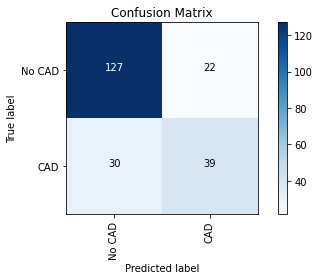

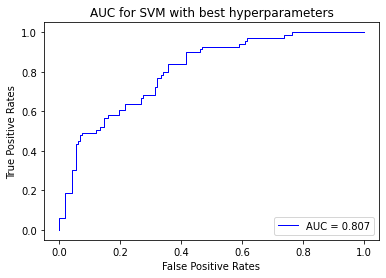

In [ ]:
svm_param = {"kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
             "C": [10, 1, 0.1, 0.01, 0.001],
             "probability": [True]}

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=0)

svm_gs = GridSearchCV(estimator = svm.SVC(), param_grid = svm_param, scoring = "recall", cv = cv, refit = True, verbose = 3)
svm_gm = svm_gs.fit(x_train, y_train)

svm_y_pred = svm_gm.predict(x_test)
svm_y_score = svm_gm.predict_proba(x_test)[:, 1]

print_accuracy(y_test, svm_y_pred)
draw_confusion_matrix(y_test, svm_y_pred, ["No CAD", "CAD"])
draw_roc_curve(y_test, svm_y_score, title = "AUC for SVM with best hyperparameters")

Accuracy:    0.724771
Precision:   0.563380
Recall:      0.579710
F1 Score:    0.571429



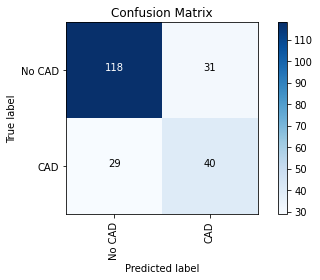

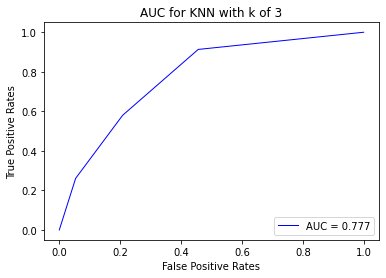

In [ ]:
# result with imbalanced data
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
knn_y_pred = knn.predict(x_test)
knn_y_score = knn.predict_proba(x_test)[:, 1]

print_accuracy(y_test, knn_y_pred)
draw_confusion_matrix(y_test, knn_y_pred, ["No CAD", "CAD"])
draw_roc_curve(y_test, knn_y_score, title = "AUC for KNN with k of 3")

Epoch 1/150
51/51 [==============================] - 1s 5ms/step - loss: 0.8054 - accuracy: 0.4763
Epoch 2/150
51/51 [==============================] - 0s 4ms/step - loss: 0.7339 - accuracy: 0.5652
Epoch 3/150
51/51 [==============================] - 0s 5ms/step - loss: 0.6652 - accuracy: 0.6304
Epoch 4/150
51/51 [==============================] - 0s 5ms/step - loss: 0.6699 - accuracy: 0.6206
Epoch 5/150
51/51 [==============================] - 0s 8ms/step - loss: 0.6545 - accuracy: 0.6087
Epoch 6/150
51/51 [==============================] - 0s 7ms/step - loss: 0.6295 - accuracy: 0.6502
Epoch 7/150
51/51 [==============================] - 0s 6ms/step - loss: 0.6359 - accuracy: 0.6383
Epoch 8/150
51/51 [==============================] - 0s 6ms/step - loss: 0.6086 - accuracy: 0.6502
Epoch 9/150
51/51 [==============================] - 0s 6ms/step - loss: 0.6239 - accuracy: 0.6462
Epoch 10/150
51/51 [==============================] - 0s 6ms/step - loss: 0.6063 - accuracy: 0.6462
Epoch 11/

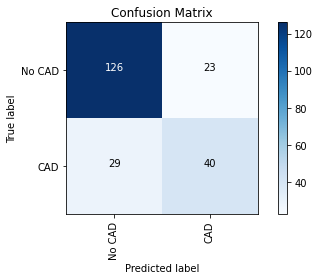

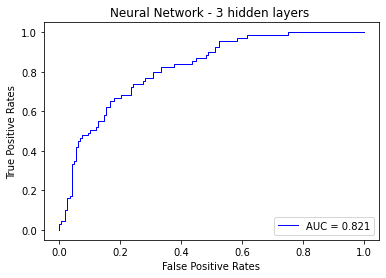

In [ ]:
model = tf.keras.models.Sequential()
model.add(Dense(64, activation='relu', input_dim=5))
model.add(Dropout(0.75))
model.add(Dense(64, activation='relu', input_dim=5))
model.add(Dense(64, activation='relu', input_dim=5))
model.add(Dropout(0.75))
model.add(Dense(64, activation='relu', input_dim=5))
model.add(Flatten())
model.add(Dropout(0.75))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=150, batch_size=10)
y_temp = model.predict(x_test)
nn_y_score = y_temp
y_pred = []
for x in y_temp:
  if x[0] < 0.5:
    y_pred.append(0)
  else:
    y_pred.append(1)
print_accuracy(y_test, y_pred)
draw_confusion_matrix(y_test, y_pred, ["No CAD", "CAD"])
draw_roc_curve(y_test, nn_y_score, "Neural Network - 3 hidden layers ", c="blue", line_width=1)

###Decision Tree Classifier

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)

Accuracy:    0.743119
Precision:   0.600000
Recall:      0.565217
F1 Score:    0.582090



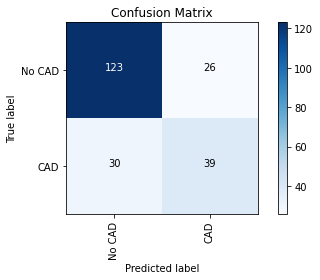

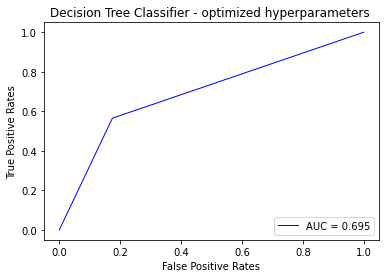

In [ ]:
print_accuracy(y_test, pred)
draw_confusion_matrix(y_test, pred, ["No CAD", "CAD"])
draw_roc_curve(y_test, pred, "Decision Tree Classifier - optimized hyperparameters ", c="blue", line_width=1)

###Random Forest

Accuracy:    0.770642
Precision:   0.655738
Recall:      0.579710
F1 Score:    0.615385



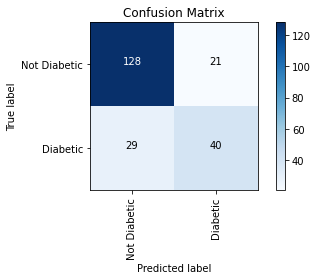

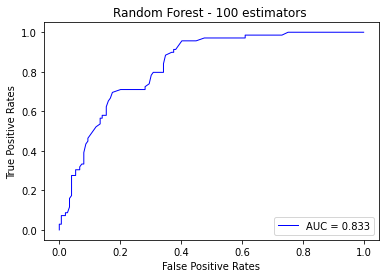

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
rf_y_score = model.predict_proba(x_test)[:, 1]
print_accuracy(y_test, y_pred)
draw_confusion_matrix(y_test, y_pred, ["Not Diabetic", "Diabetic"])
draw_roc_curve(y_test, rf_y_score, "Random Forest - 100 estimators ", c="blue", line_width=1)

###User Input

In [ ]:
@anvil.server.callable
def diabetes_checker(PregnanciesINP,GlucoseINP, BloodPressureINP, BMIINP, AgeINP):
  #user_input = [Pregnancies, Glucose, BloodPressure, BMI, Age]
  user_input = [[PregnanciesINP, GlucoseINP, BloodPressureINP, BMIINP, AgeINP]]

  user_df = pd.DataFrame(user_input, columns=["Pregnancies", "Glucose", "BloodPressure", "BMI", "Age"])
  df3 = user_backup.append(user_df, ignore_index=True)

  X = df3.drop("Outcome", axis = 1)
  Y = df3["Outcome"].copy()

  print("X shape before processing is", X.shape)
  df_numerical = X

  numerical_pipeline = Pipeline([
                                ("std_scaler", StandardScaler())
                                ])

  numerical_features = list(df_numerical)

  full_pipeline = ColumnTransformer([
                  ("numerical", numerical_pipeline, numerical_features),
                  ])
  user_inp = full_pipeline.fit_transform(X)

  print("X shape after processing is", user_inp.shape)
  np.unique(np.isnan(user_inp), return_counts=True)
  u_prepared = np.array([user_inp[-1][0:5]])
  y_temp = model.predict(u_prepared)
  return y_temp[0]
   

anvil.server.wait_forever()


KeyboardInterrupt: ignored

In [ ]:
'''u_prepared = np.array([user_inp[-1]])
y_temp = model.predict(u_prepared)
if y_temp[0] == 1:
  print("High chance of suffering from diabetes.")
else:
  print("Low chance of suffering from diabetes.")

anvil.server.wait_forever()'''

High chance of suffering from diabetes.


KeyboardInterrupt: ignored